## Check Region

Script to visualize missing data in regional NHRU precipitation forcing files.

Theodore Barnhart | tbarnhart@usgs.gov

In [1]:
newRegions = ['01','02','03','04','05','06','13','14','15','16','18','20','21'] # 17 removed b/c still processing
files = []
for reg in newRegions:
    files.append('./data/hru_%s_stage_4_precip_interp_inches.pcl'%reg)

In [2]:
def check_forcing(fl):
    reg = fl.split('_')[1]
    dat = pd.read_pickle(fl)
    del dat['year']
    del dat['month']
    del dat['day']
    del dat['minute']
    del dat['hour']
    del dat['second']

    mat = dat.as_matrix() # convert data to a matrix
    mat = np.flipud(mat)
    #mat2 = mat.copy()

    datetime = dat.index # pull the index
    del dat

    # convert NaNs to -999
    mat[np.isnan(mat)] = -999
    mat = np.ma.masked_where(mat<0,mat)
    cmap = plt.cm.Greens
    cmap.set_bad(color='k')

    fig = plt.figure(figsize=(15,7))
    ax = fig.add_subplot(111)
    plt.sca(ax)
    p1 = plt.pcolormesh(mat,cmap=cmap,vmax=np.percentile(mat,99))
    cb = plt.colorbar()
    cb.set_label('Precipitation [inches]', fontsize = 16)
    plt.ylabel('Date', fontsize=16)
    plt.xlabel('HRU', fontsize=16)
    plt.title('Region: %s'%reg,fontsize=18)

    # get the ylabels
    yticks = ax.get_yticks()
    xticks = ax.get_xticks()

    ylabs= []
    for tick in yticks[0:-1]:
        ylabs.append('%s/%s'%(datetime[int(tick)].year,datetime[int(tick)].month))

    xlabs = xticks+1
    xlabs = np.array(xlabs,dtype=int)

    ax.set_yticklabels(ylabs);
    ax.set_xticklabels(xlabs);

In [3]:
def missing_bars(fl):
    reg = fl.split('_')[1]
    dat = pd.read_pickle(fl)
    n = len(dat)
    del dat['year']
    del dat['month']
    del dat['day']
    del dat['minute']
    del dat['hour']
    del dat['second']

    mat = dat.as_matrix() # convert data to a matrix
    del dat
    mat = np.flipud(mat)
    nas = np.isnan(mat)
    nas = (np.sum(nas,axis=0)/float(n))*100. # compute percent
    
    fig = plt.figure(figsize=(15,5))
    ax = fig.add_subplot(111)
    plt.sca(ax)
    plt.bar(np.arange(1,len(nas)+1),nas)
    plt.ylim(0,100)
    plt.ylabel('Missing Data [%]', fontsize = 16)
    plt.xlabel('HRU', fontsize=16)
    plt.title('Region: %s'%reg, fontsize=18)
    
    # fix x labels
    #xticks = ax.get_xticks()
    #xlabs = xticks+1
    #xlabs = np.array(xlabs,dtype=int)
    #ax.set_xticklabels(xlabs);
    

### missing data are in black below

[None, None, None, None, None, None, None, None, None, None, None, None, None]

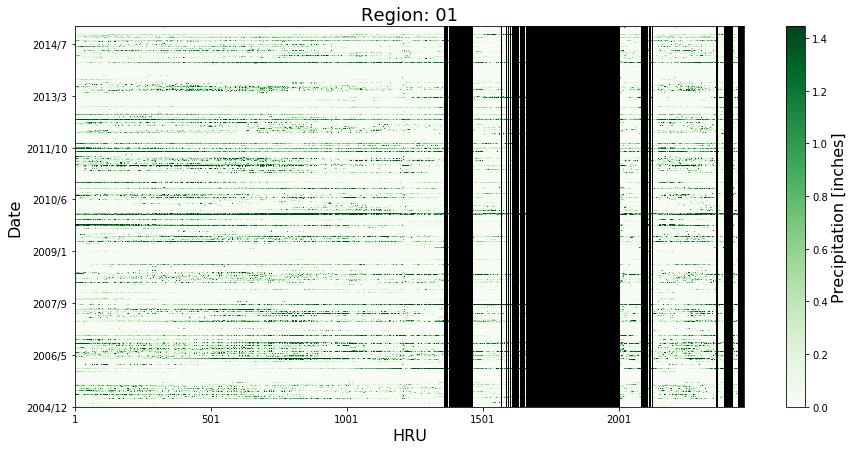

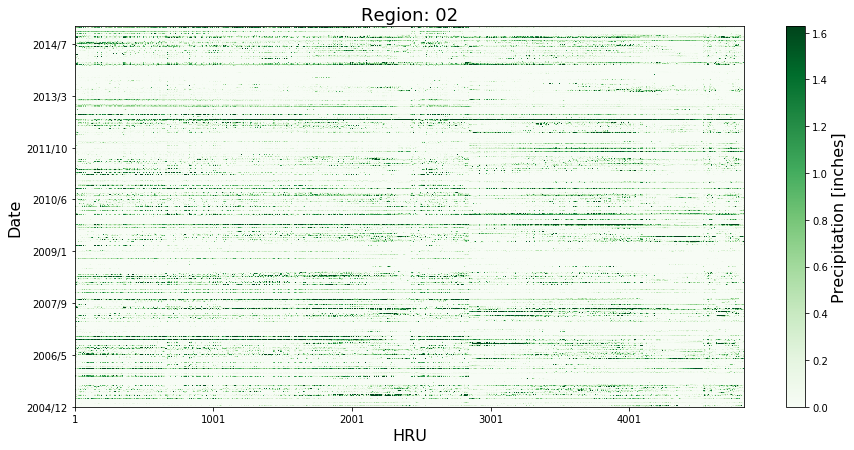

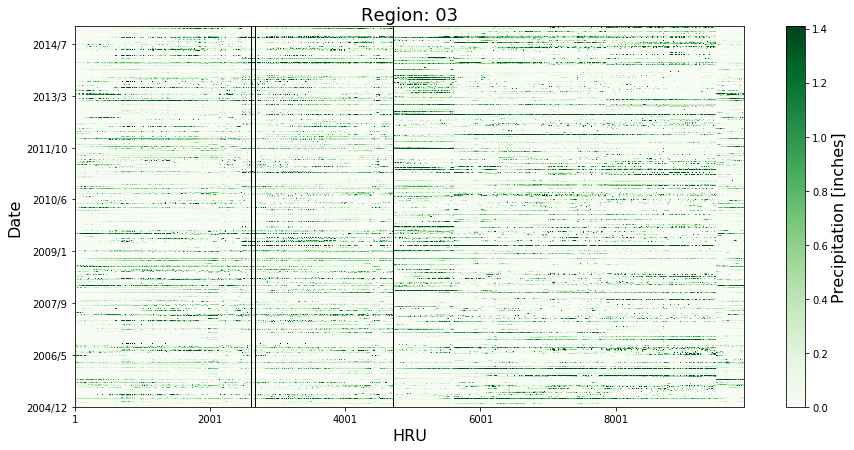

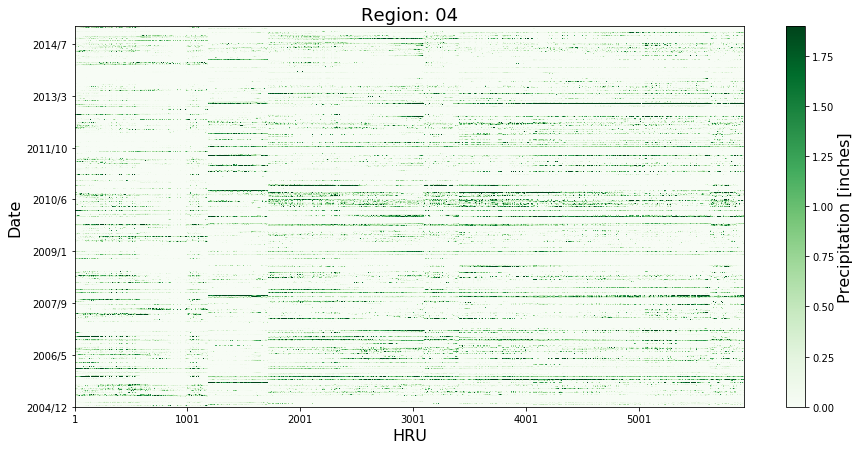

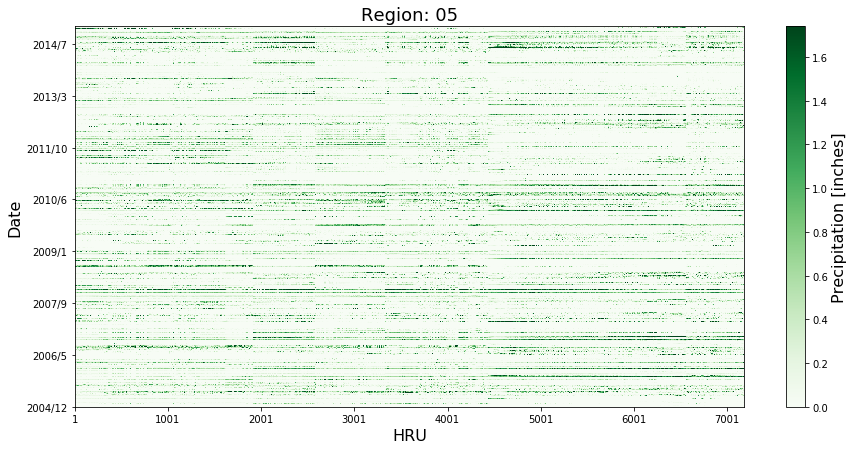

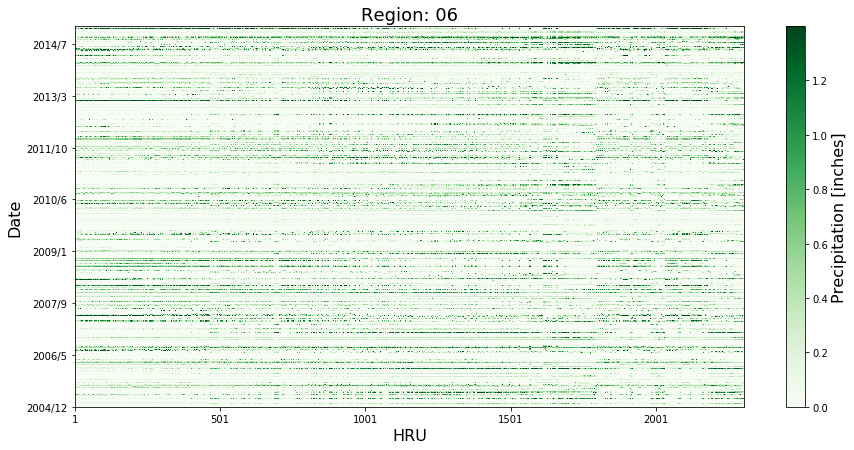

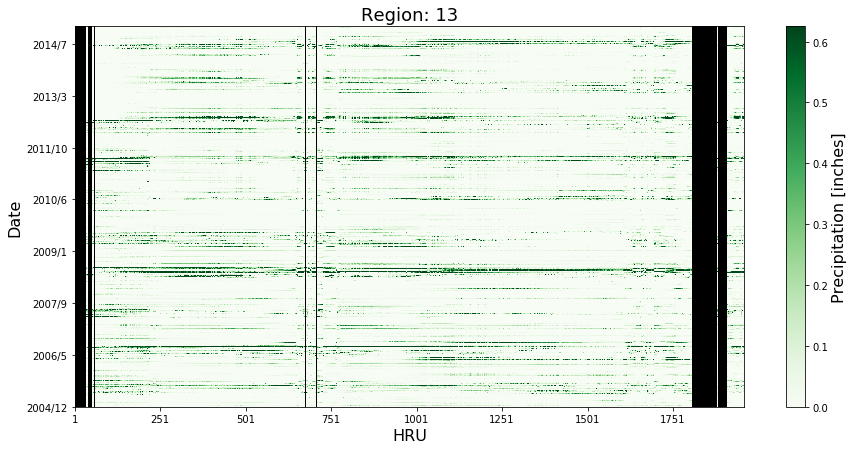

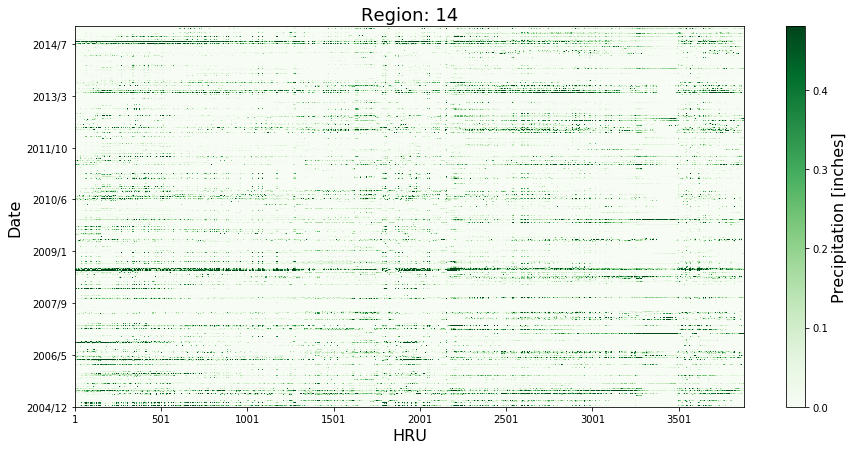

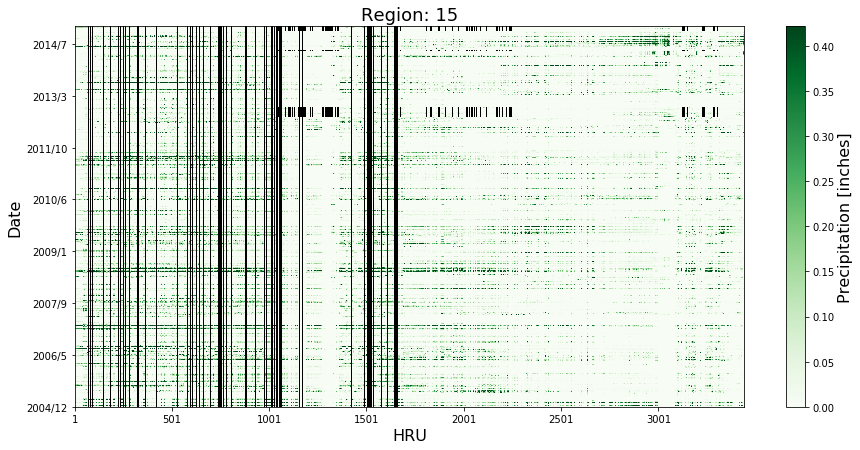

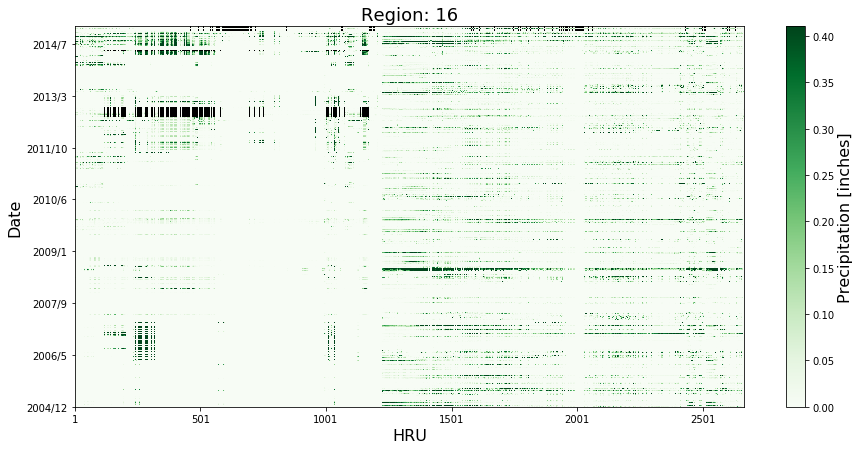

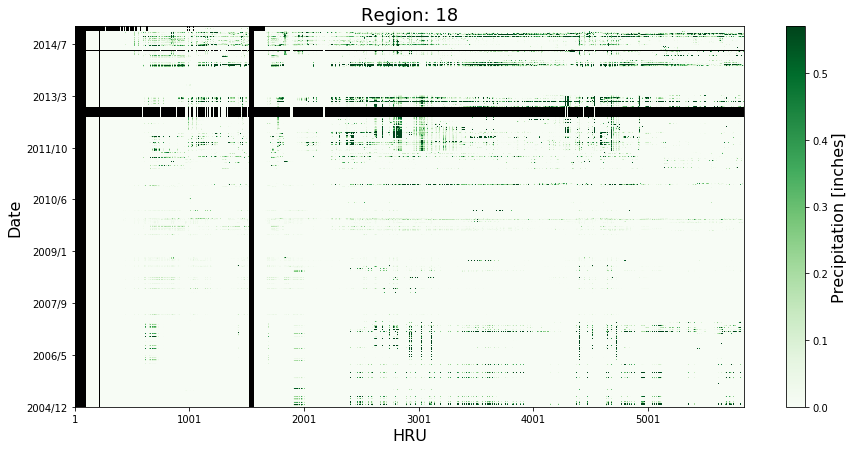

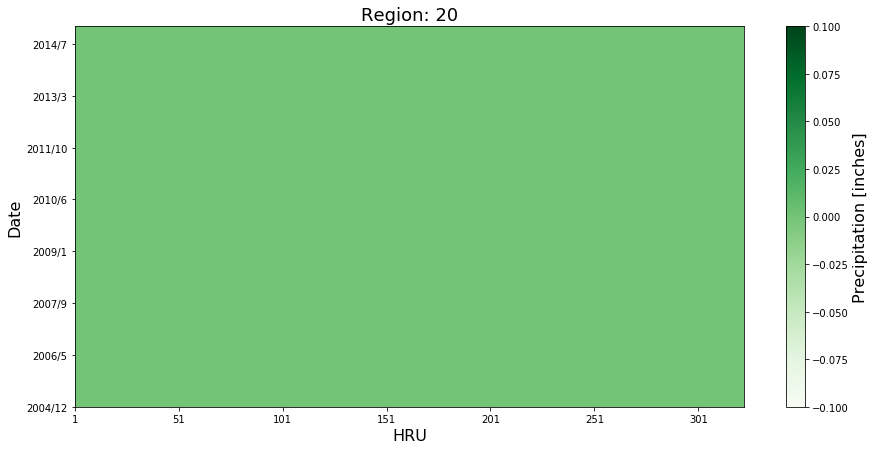

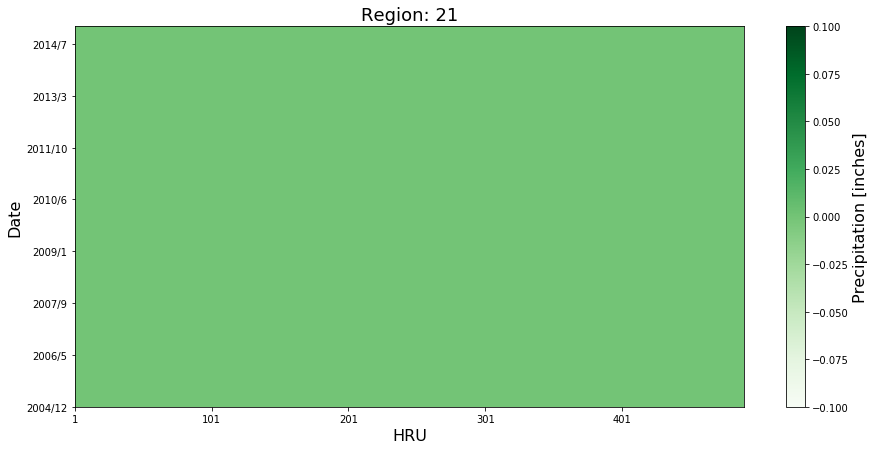

In [4]:
[check_forcing(fl) for fl in files]

[None, None, None, None, None, None, None, None, None, None, None, None, None]

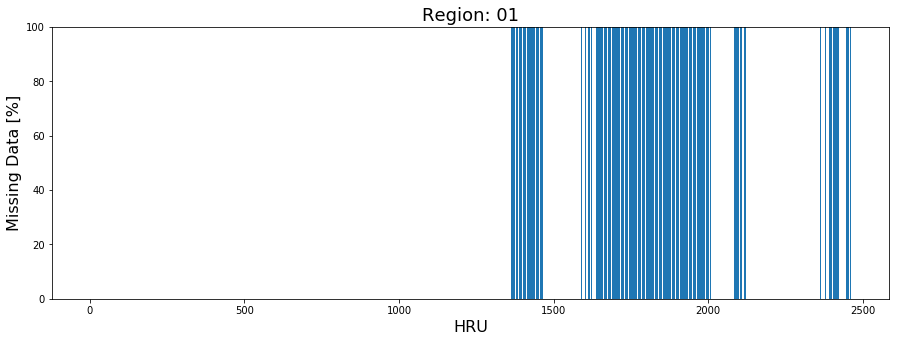

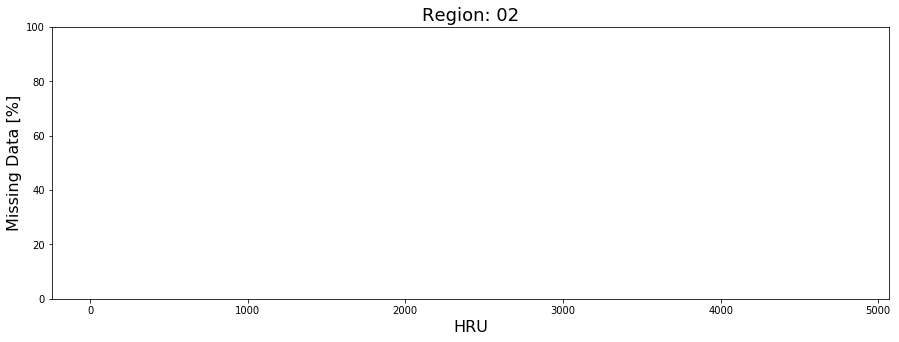

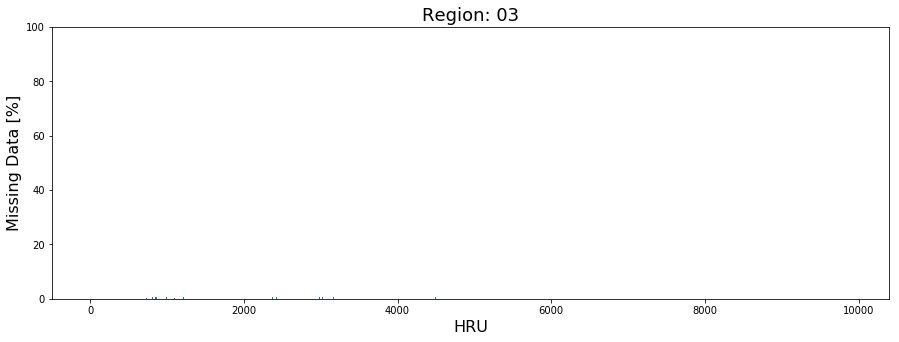

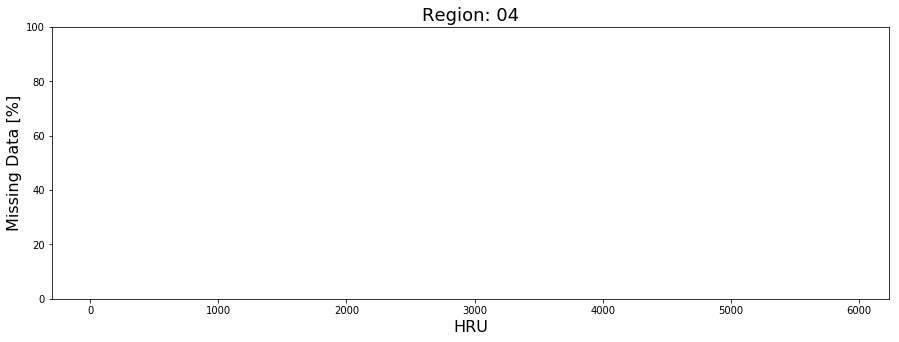

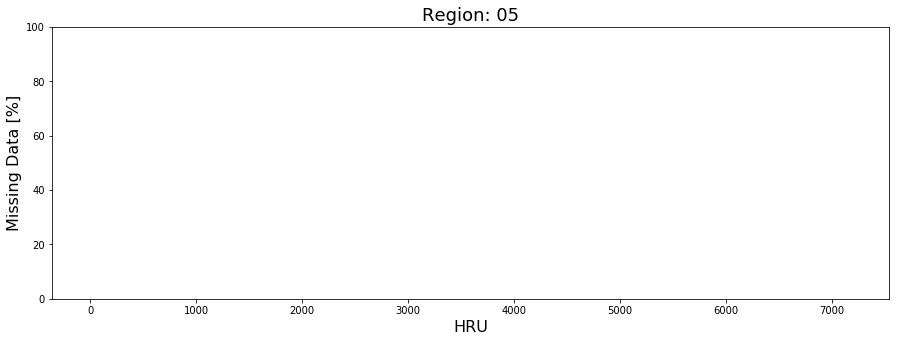

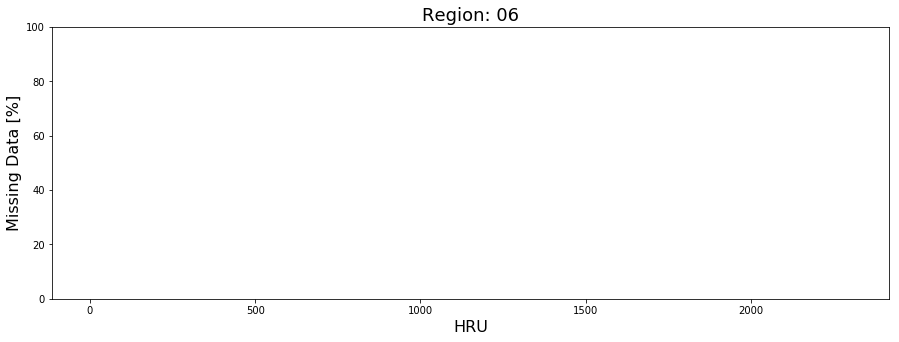

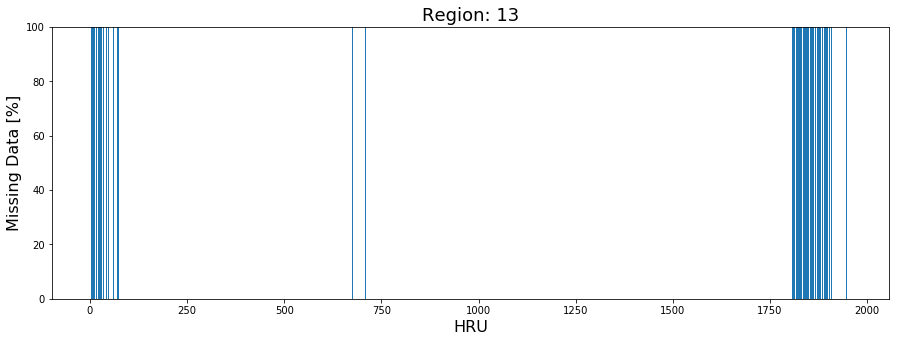

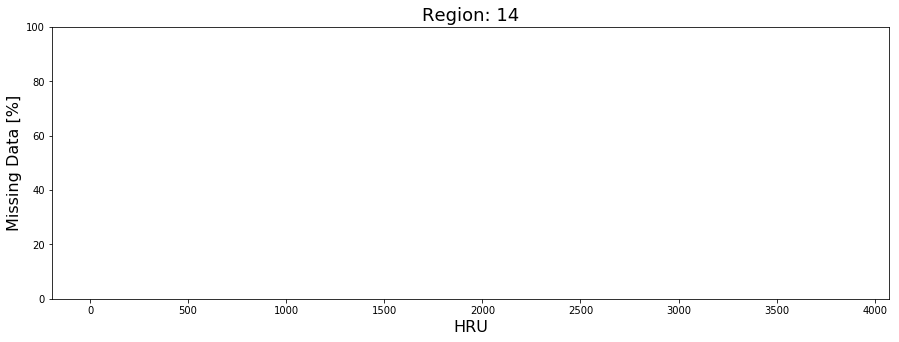

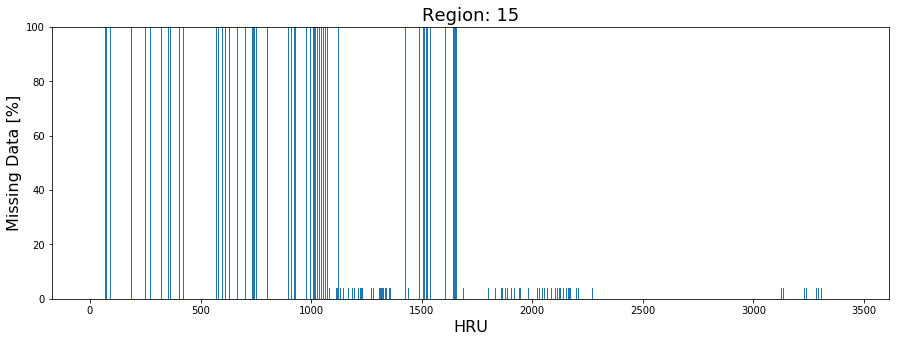

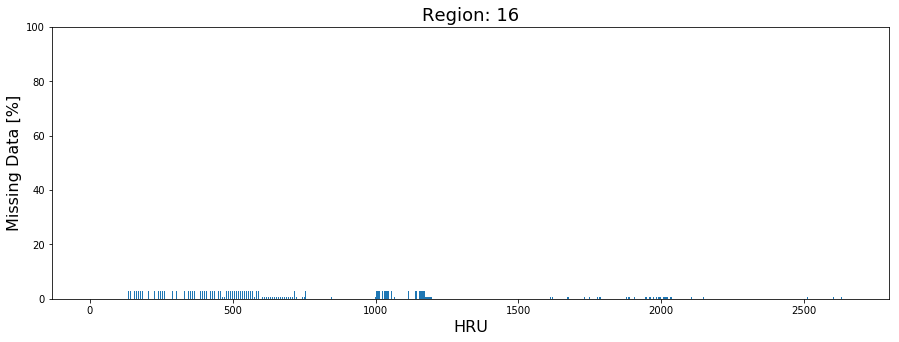

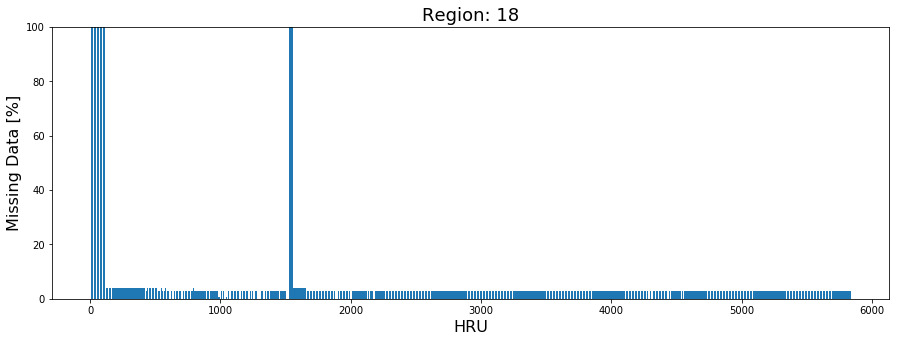

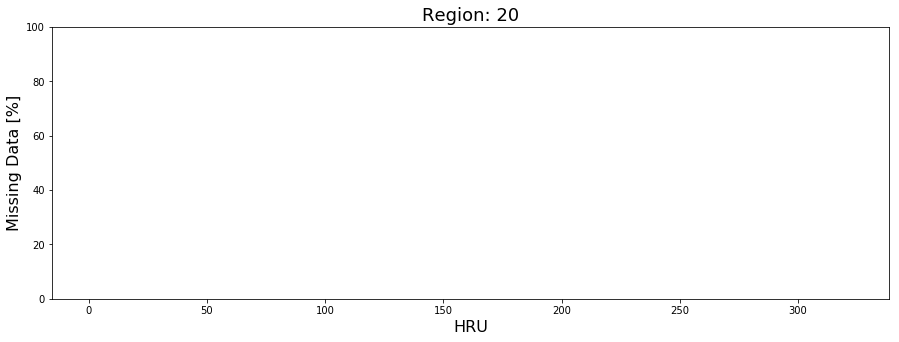

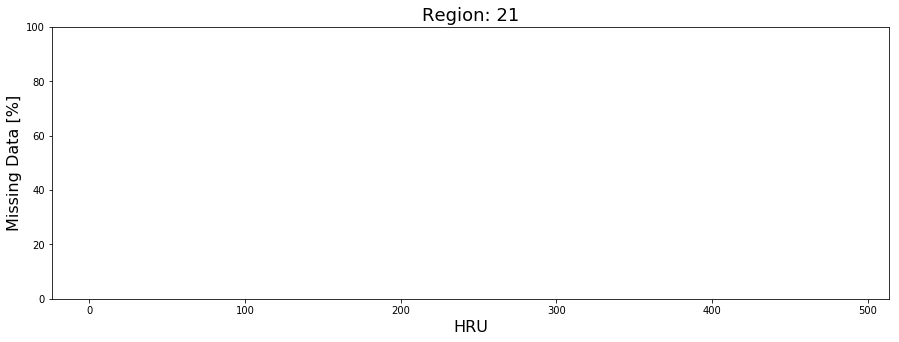

In [5]:
[missing_bars(fl) for fl in files]